In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트 사용을 위해 설치
import koreanize_matplotlib

# df = pd.read_csv("boostcourse-ds-510/data/NHIS_OPEN_GJ_2017.CSV.zip", encoding="cp949")
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")
%matplotlib inline

In [2]:
import matplotlib.font_manager as fm

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumGothic') 
# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc("axes", unicode_minus=False)

In [3]:
# 한글폰트를 설정해 주지 않으면 그래프 상에서 한글이 깨져보입니다.
# 한글이 출력될 수 있도록 폰트 설정을 해줍니다.
# 운영체제별 설정을 위해 로드 합니다.

import os

# 윈도우, 맥 외의 OS는 별도로 설정해 주세요.
if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")
    
# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc("axes", unicode_minus=False)

In [4]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.

%config InlineBackend.figure_format = 'retina'

📌 Q3. 흡연하는 사람과 음주하는 사람들의 수는 얼마나 차이가 있을까요?

건강보험에서 제공하고 있는 데이터는 용량을 줄이기 위해 대부분의 데이터를 숫자 형태로 제공하고 있습니다. replace 기능을 사용하면 딕셔너리의 값을 의미하는 문자 형태로 변경해 볼 수 있습니다. 다음 제공되는 딕셔너리 값을 사용하여 숫자가 의미하는 문자 형태로 변경한 뒤 전체 데이터에서 음주와 흡연에 대한 교차 테이블을 구해 각 해당 빈도수를 구하고 시각화 해주세요!

//흡연 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)
//음주 0(마시지 않은다), 1(마신다)
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

// df["흡연"]
// df["음주"]

groupby, pivot_table로 구할 수도 있지만, 수업에서는 다루지 않았던 pandas의 crosstab 기능을 사용해서도 비교적 쉽게 구할 수 있습니다.
crosstab 을 사용할 때는 다음의 문서를 참고하여 구해보세요. pandas.crosstab — pandas documentation
그리고 막대그래프를 통해 결과를 시각화해주세요! 시각화를 할 때 그래프의 스타일이나 막대의 색상 등이 달라도 상관 없으니 사용하고 싶은 스타일을 적용해서 시각화해도 좋습니다.

In [5]:
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [6]:
df = df[['흡연상태', '음주여부']]
df

,흡연상태,음주여부
0,3.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,1.0
4,3.0,0.0
...,...,...
999995,1.0,1.0
999996,1.0,0.0
999997,1.0,0.0
999998,2.0,1.0


In [7]:
# smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
# drink = {0: "안마심", 1: "마심"}

In [8]:
df = df.rename(columns={'흡연상태':'흡연', '음주여부':'음주'})

In [9]:
df.value_counts()

흡연   음주 
1.0  0.0    394503
     1.0    213743
3.0  1.0    162166
2.0  1.0    120779
     0.0     55334
3.0  0.0     52845
dtype: int64

In [10]:
df.columns

Index(['흡연', '음주'], dtype='object')

In [11]:
df2 = df.replace({1.0 : "흡연안함", 2.0: "끊음", 3.0: "흡연중"})
df2 = df.replace({0.0: "안마심", 1.0: "마심"})
print(df2)
type(df2)

         흡연   음주
0       3.0  안마심
1        마심  안마심
2        마심  안마심
3        마심   마심
4       3.0  안마심
...     ...  ...
999995   마심   마심
999996   마심  안마심
999997   마심  안마심
999998  2.0   마심
999999   마심  안마심

[1000000 rows x 2 columns]


pandas.core.frame.DataFrame

In [12]:
df2

,흡연,음주
0,3.0,안마심
1,마심,안마심
2,마심,안마심
3,마심,마심
4,3.0,안마심
...,...,...
999995,마심,마심
999996,마심,안마심
999997,마심,안마심
999998,2.0,마심


<AxesSubplot:xlabel='흡연', ylabel='count'>

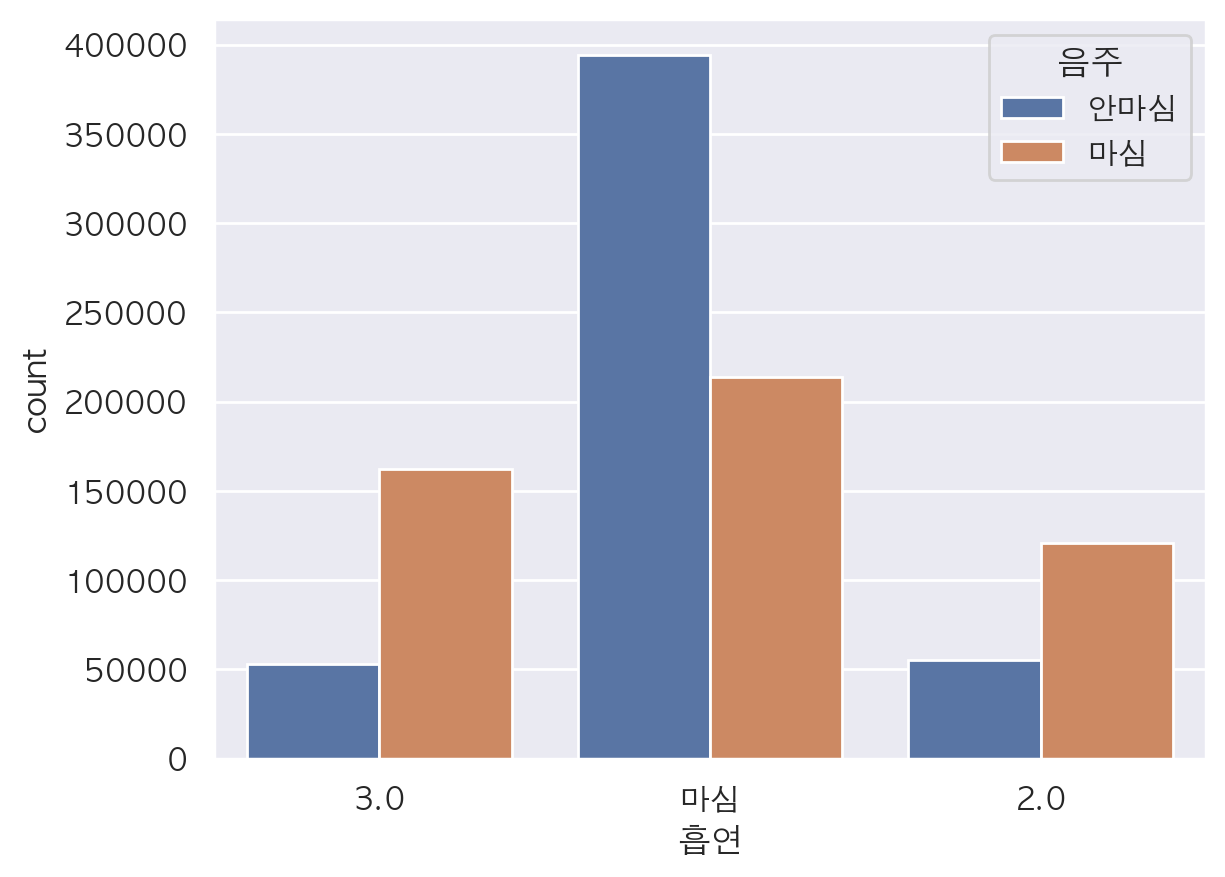

In [13]:
# # Mac
sns.set(font_scale=1, font="AppleGothic")

sns.countplot(data=df2, x="흡연", hue="음주")

<AxesSubplot:xlabel='흡연', ylabel='count'>

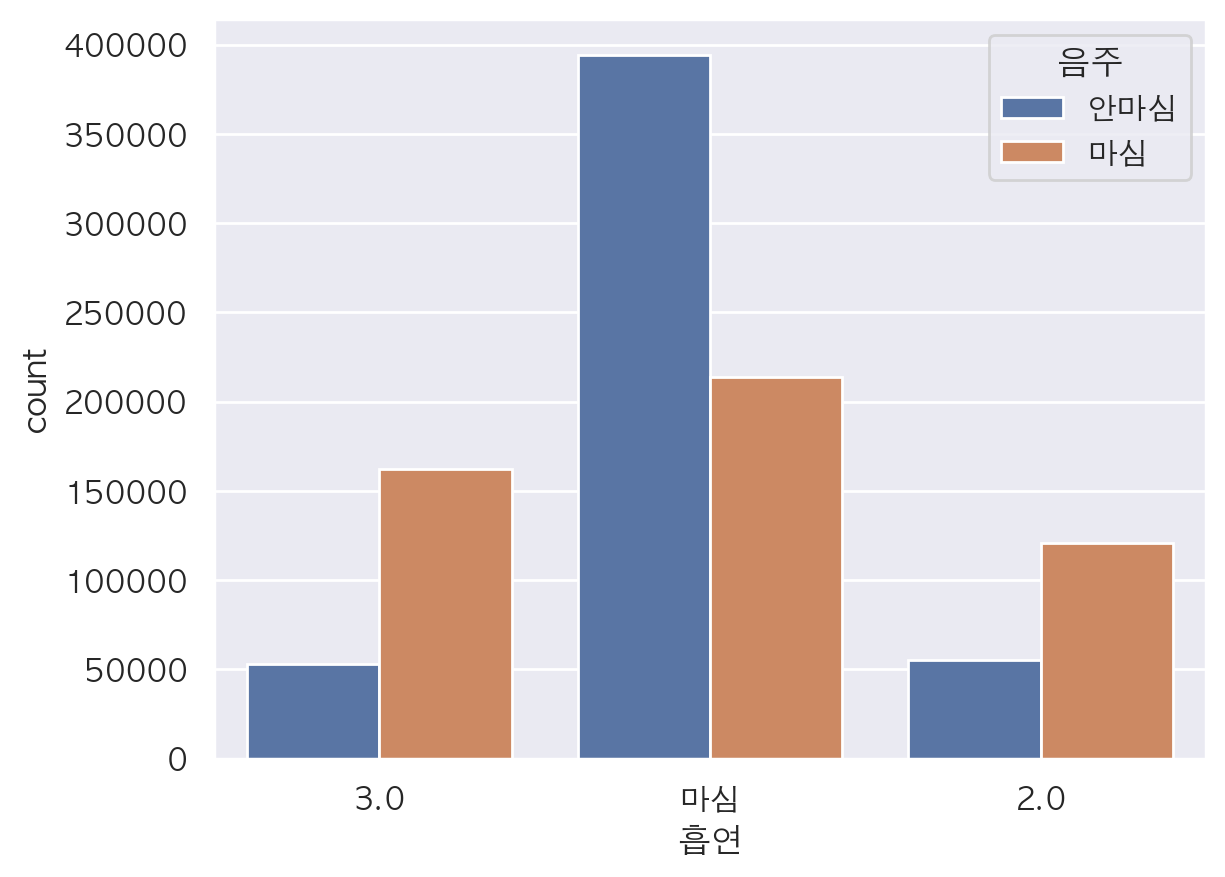

In [14]:
#plt.figure(figsize=(15, 4))
sns.countplot(data=df2, x="흡연", hue="음주")